In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [3]:
pkm_matchup_url = "data/PokeTypeMatchupData.csv"

In [4]:
pkm_mu_df = pd.read_csv("data/PokeTypeMatchupData.csv")
pkm_mu_df.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
1,Ivysaur,#002,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
2,Venusaur,#003,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
3,Charmander,#004,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5
4,Charmeleon,#005,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5


In [5]:
pkm_mu_df.replace(to_replace = "[#, *]", value = "", regex = True, inplace = True)
pkm_mu_df["Number"] = pkm_mu_df["Number"].astype(int)

types = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice", "Fighting", "Poison", "Ground", "Flying",
        "Psychic", "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"]
pkm_mu_df[types]=pkm_mu_df[types].astype(float)

pkm_mu_df.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,5,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [6]:
pkm_mu_df.describe()

,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,481.357639,0.861979,1.157986,1.044705,1.024740,1.049913,1.137153,1.072483,0.961372,1.148438,1.156250,0.967014,1.012153,1.185764,1.045139,0.945312,1.068142,0.990451,1.115451
std,277.631248,0.298627,0.683976,0.592946,0.647853,0.755130,0.668275,0.750115,0.574196,0.699141,0.526163,0.527708,0.635596,0.694855,0.566954,0.391268,0.484567,0.502511,0.580026
min,1.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,220.750000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.875000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,536.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,726.250000,1.000000,2.000000,1.000000,1.000000,1.000000,1.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,893.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


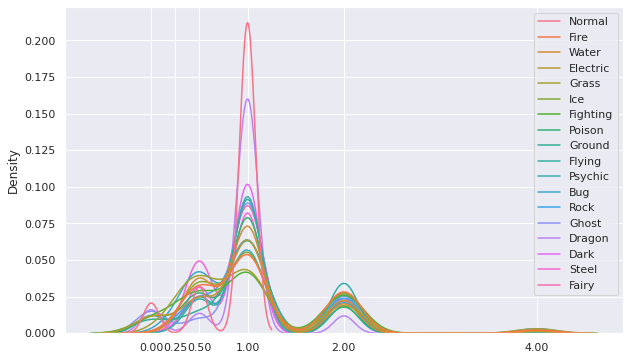

In [7]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=pkm_mu_df[types])
plt.xticks([0,.25,.5,1,2,4])
plt.show()

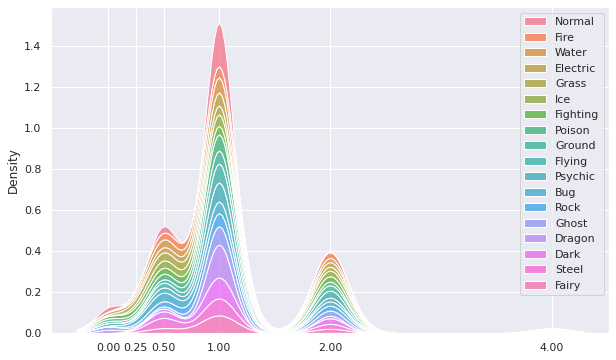

In [8]:
#pkm_mu_df[types].hist(figsize=(15,15))
plt.figure(figsize=(10,6))
sns.kdeplot(data=pkm_mu_df[types], multiple="stack")
plt.xticks([0,.25,.5,1,2,4])
plt.show()

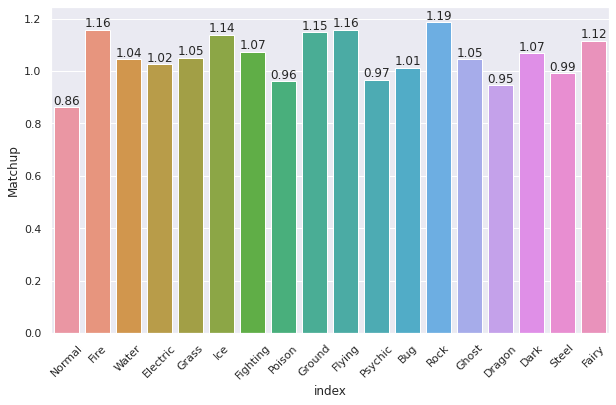

In [9]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=pkm_mu_df[types].mean().reset_index(name="Matchup"), x="index", y="Matchup")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.xticks(rotation=45)
plt.show()

In [10]:
pkm_mu_melt_df = pd.melt(pkm_mu_df, id_vars=["Name", "Number"], value_vars=types, var_name="Type", value_name="Matchup")
pkm_mu_melt_df.head()

,Name,Number,Type,Matchup
0,Bulbasaur,1,Normal,1.0
1,Ivysaur,2,Normal,1.0
2,Venusaur,3,Normal,1.0
3,Charmander,4,Normal,1.0
4,Charmeleon,5,Normal,1.0


In [11]:
pkm_weak_df = pkm_mu_melt_df[pkm_mu_melt_df["Matchup"]>1][["Name","Number","Matchup"]].groupby(["Name","Number"]).size().reset_index(name="Weaknesses").sort_values("Number").reset_index(drop=True)
pkm_weak_df.head(6)

,Name,Number,Weaknesses
0,Bulbasaur,1,4
1,Ivysaur,2,4
2,Venusaur,3,4
3,Charmander,4,3
4,Charmeleon,5,3
5,Charizard,6,3


In [12]:
pkm_weak_df.describe()["Weaknesses"]

count    576.000000
mean       3.255208
std        1.429797
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Weaknesses, dtype: float64

In [13]:
weak_mean = pkm_weak_df[pkm_weak_df["Weaknesses"]>pkm_weak_df["Weaknesses"].mean()].shape[0]
weak_mean

211

In [14]:
weak_max = pkm_weak_df[pkm_weak_df["Weaknesses"]==pkm_weak_df["Weaknesses"].max()].shape[0]
weak_max

12

In [15]:
pkm_weak_df[pkm_weak_df["Weaknesses"]==pkm_weak_df["Weaknesses"].max()]

,Name,Number,Weaknesses
74,Exeggcute,102,7
75,Exeggutor,103,7
160,Tyranitar,248,7
161,Celebi,251,7
170,Nuzleaf,274,7
171,Shiftry,275,7
197,Lunatone,337,7
198,Solrock,338,7
245,Snover,459,7
246,Abomasnow,460,7


In [16]:
pkm_res_df = pkm_mu_melt_df[pkm_mu_melt_df["Matchup"].between(0,1,inclusive="neither")][["Name","Number","Matchup"]].groupby(["Name","Number"]).size().reset_index(name="Resistances").sort_values("Number").reset_index(drop=True)
pkm_res_df.head(6)

,Name,Number,Resistances
0,Bulbasaur,1,5
1,Ivysaur,2,5
2,Venusaur,3,5
3,Charmander,4,6
4,Charmeleon,5,6
5,Charizard,6,6


In [17]:
pkm_res_df.describe()["Resistances"]

count    536.000000
mean       4.223881
std        2.134336
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       11.000000
Name: Resistances, dtype: float64

In [18]:
res_mean = pkm_res_df[pkm_res_df["Resistances"]>pkm_res_df["Resistances"].mean()].shape[0]
res_mean

188

In [19]:
res_max = pkm_res_df[pkm_res_df["Resistances"]==pkm_res_df["Resistances"].max()].shape[0]
res_max

4

In [20]:
pkm_res_df[pkm_res_df["Resistances"]==pkm_res_df["Resistances"].max()]

,Name,Number,Resistances
60,Magnemite,81,11
61,Magneton,82,11
225,Magnezone,462,11
436,Togedemaru,777,11


In [21]:
pkm_neutral_df = pkm_mu_melt_df[pkm_mu_melt_df["Matchup"]==1][["Name","Number","Matchup"]].groupby(["Name","Number"]).size().reset_index(name="Neutralities").sort_values("Number").reset_index(drop=True)
pkm_neutral_df.head(6)

,Name,Number,Neutralities
0,Bulbasaur,1,9
1,Ivysaur,2,9
2,Venusaur,3,9
3,Charmander,4,9
4,Charmeleon,5,9
5,Charizard,6,8


In [22]:
pkm_neutral_df.describe()["Neutralities"]

count    576.000000
mean      10.145833
std        3.134035
min        2.000000
25%        8.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: Neutralities, dtype: float64

In [23]:
neutral_mean = pkm_neutral_df[pkm_neutral_df["Neutralities"]>pkm_neutral_df["Neutralities"].mean()].shape[0]
neutral_mean

302

In [24]:
neutral_max = pkm_neutral_df[pkm_neutral_df["Neutralities"]==pkm_neutral_df["Neutralities"].max()].shape[0]
neutral_max

38

In [25]:
pkm_neutral_df[pkm_neutral_df["Neutralities"]==pkm_neutral_df["Neutralities"].max()]

,Name,Number,Neutralities
36,Meowth,52,16
38,Persian,53,16
82,Lickitung,108,16
88,Chansey,113,16
90,Kangaskhan,115,16
101,Tauros,128,16
105,Ditto,132,16
106,Eevee,133,16
110,Porygon,137,16
111,Snorlax,143,16


In [26]:
pkm_immune_df = pkm_mu_melt_df[pkm_mu_melt_df["Matchup"]==0][["Name","Number","Matchup"]].groupby(["Name","Number"]).size().reset_index(name="Immunities").sort_values("Number").reset_index(drop=True)
pkm_immune_df.head()

,Name,Number,Immunities
0,Charizard,6,1
1,Butterfree,12,1
2,SandshrewAlolaForm,27,1
3,Sandshrew,27,1
4,SandslashAlolaForm,28,1


In [28]:
pkm_immune_df.describe()["Immunities"]

count    287.000000
mean       1.341463
std        0.562638
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Immunities, dtype: float64

In [29]:
pkm_immune_df.shape[0]

287

In [31]:
pkm_immune_df[pkm_immune_df["Immunities"]==pkm_immune_df["Immunities"].max()].shape[0]

13

In [30]:
pkm_immune_df[pkm_immune_df["Immunities"]==pkm_immune_df["Immunities"].max()]

,Name,Number,Immunities
92,Sableye,302,3
110,Drifloon,425,3
111,Drifblim,426,3
160,YamaskGalarianForm,562,3
180,Golett,622,3
181,Golurk,623,3
200,Honedge,679,3
201,Doublade,680,3
202,Aegislash,681,3
236,Sandygast,769,3
